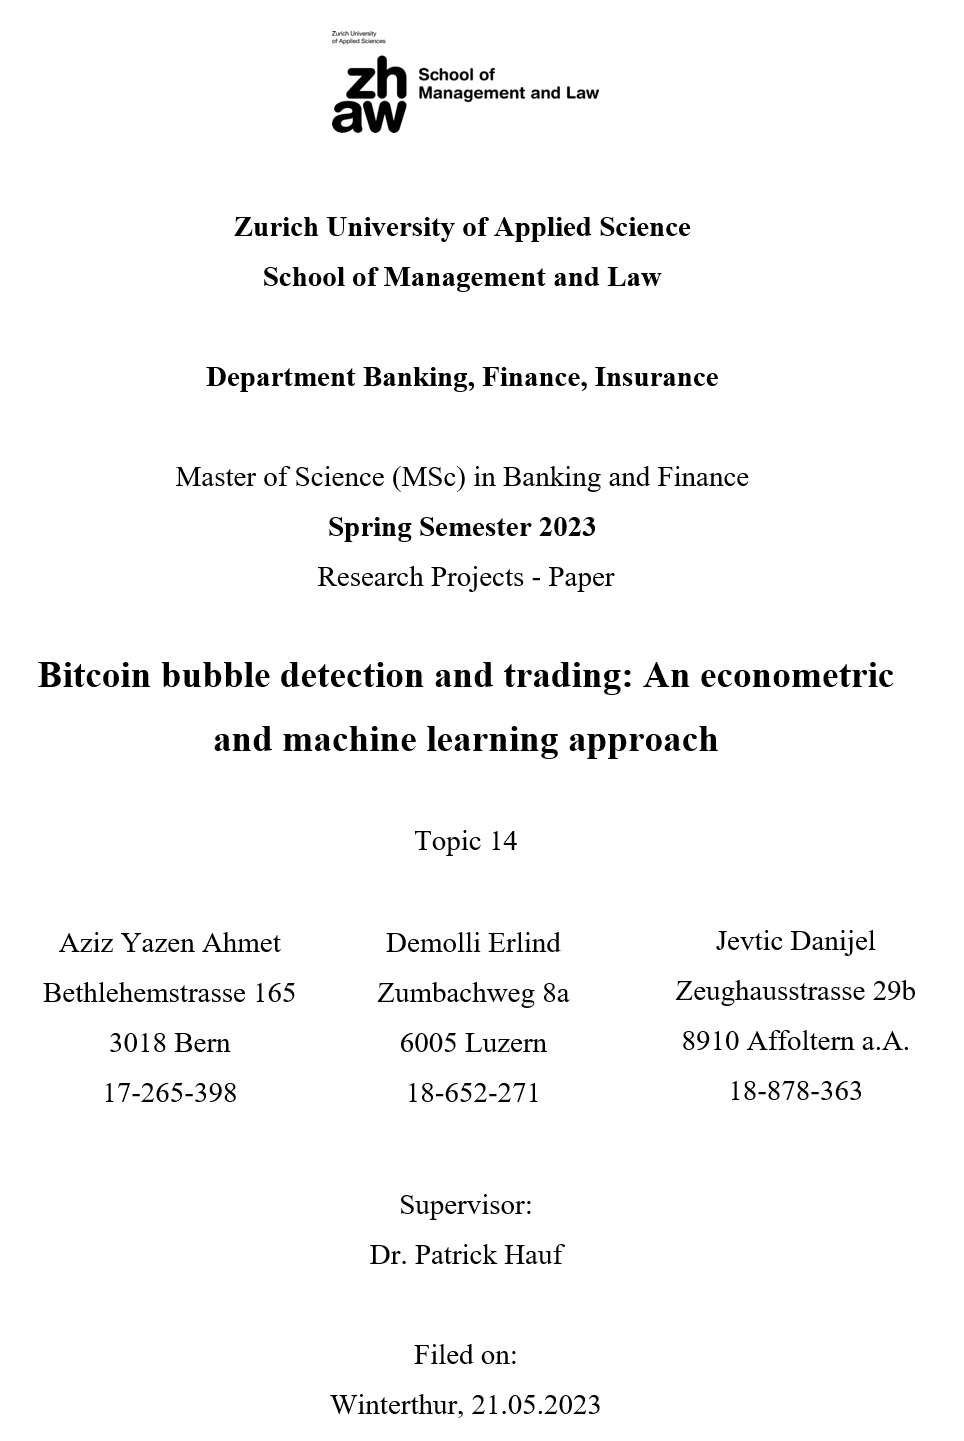

# 1. Librarys and Functions

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf

#Data vizualization
%matplotlib inline
import seaborn as sns

#Statistics Libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import t

#Date libraries
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
# Plotting Function:

def plot_2_graphes(data1, data2,title1 = str,title2 = str,plot_title=str):
    plt.rcParams['figure.figsize'] = (20, 10)
    sns.set(style="darkgrid")

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(title1, color=color)
    ax1.plot(data1, color=color, alpha = 0.5)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel(title2, color=color)
    ax2.plot(data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    years = mdates.YearLocator()
    years_fmt = mdates.DateFormatter('%Y')

    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(years_fmt)

    # Set the title for the whole plot
    plt.title(plot_title)
    
    plt.xticks(rotation=45)
    plt.show()
    

In [3]:
# Plotting Function:

def plot_2_graphes_v2(data1, data2,title1 = str,title2 = str,plot_title=str):
    plt.rcParams['figure.figsize'] = (20, 10)
    sns.set(style="darkgrid")

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(title1, color=color)
    ax1.plot(data1, color=color, alpha = 0.5)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel(title2, color=color)
    ax2.plot(data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Set the title for the whole plot
    plt.title(plot_title)
    
    plt.xticks(rotation=45)
    plt.show()
    

# 2. Data import and (cleaning, preparation)

In [4]:
#BTC DF
#btc = pd.read_csv('bitcoin_csv.csv') #data from glassnode
btc = yf.download('BTC-USD', start='2014-09-17', end = '2023-03-11',period='1d') 
# yahoofin we choose this date range so that we have enough space to delete nan later



[*********************100%***********************]  1 of 1 completed


In [5]:
btc

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2023-03-06  22436.816406  22584.292969  22331.314453  22429.757812   
2023-03-07  22428.322266  22527.417969  22011.261719  22219.769531   
2023-03-08  22216.441406  22268.896484  21708.050781  21718.080078   
2023-03-09  21720.080078  21802.716797  20210.306641  20363.021484   
2023-03-10  20367.001953  20370.595703  19628.253906  20187.244141   

               Adj Close       Volume  
Date                                   
2014-09-17    457.334015     21056800  
2014-09-18    424.440002     34483200  
2014-09-19    394.795990     37919700  
2014-09-20    408.903992     36863600  
2014-09-21    398.821014     26580100  
...                  ...          ...  
2023-03-06  22429.757812  17353192895  
2023-03-07  22219.769531  22765452204  
2023-03-08  21718.080078  22536575684  
2023-03-09  20363.021484  30364664171  
2023-03-10  20187.244141  39578257695  

[3097 rows x 6 columns]

In [6]:
#Log-Returns
btc['Log_Returns'] = np.log(1 + btc['Close'].pct_change())

In [7]:
#returns
btc['Returns'] = btc['Close'].pct_change()
btc

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2023-03-06  22436.816406  22584.292969  22331.314453  22429.757812   
2023-03-07  22428.322266  22527.417969  22011.261719  22219.769531   
2023-03-08  22216.441406  22268.896484  21708.050781  21718.080078   
2023-03-09  21720.080078  21802.716797  20210.306641  20363.021484   
2023-03-10  20367.001953  20370.595703  19628.253906  20187.244141   

               Adj Close       Volume  Log_Returns   Returns  
Date                                                          
2014-09-17    457.334015     21056800          NaN       NaN  
2014-09-18    424.440002     34483200    -0.074643 -0.071926  
2014-09-19    394.795990     37919700    -0.072402 -0.069843  
2014-09-20    408.903992     36863600     0.035111  0.035735  
2014-09-21    398.821014     26580100    -0.024968 -0.024659  
...                  ...          ...          ...       ...  
2023-03-06  22429.757812  17353192895    -0.000257 -0.000257  
2023-03-07  22219.769531  22765452204    -0.009406 -0.009362  
2023-03-08  21718.080078  22536575684    -0.022837 -0.022579  
2023-03-09  20363.021484  30364664171    -0.064425 -0.062393  
2023-03-10  20187.244141  39578257695    -0.008670 -0.008632  

[3097 rows x 8 columns]

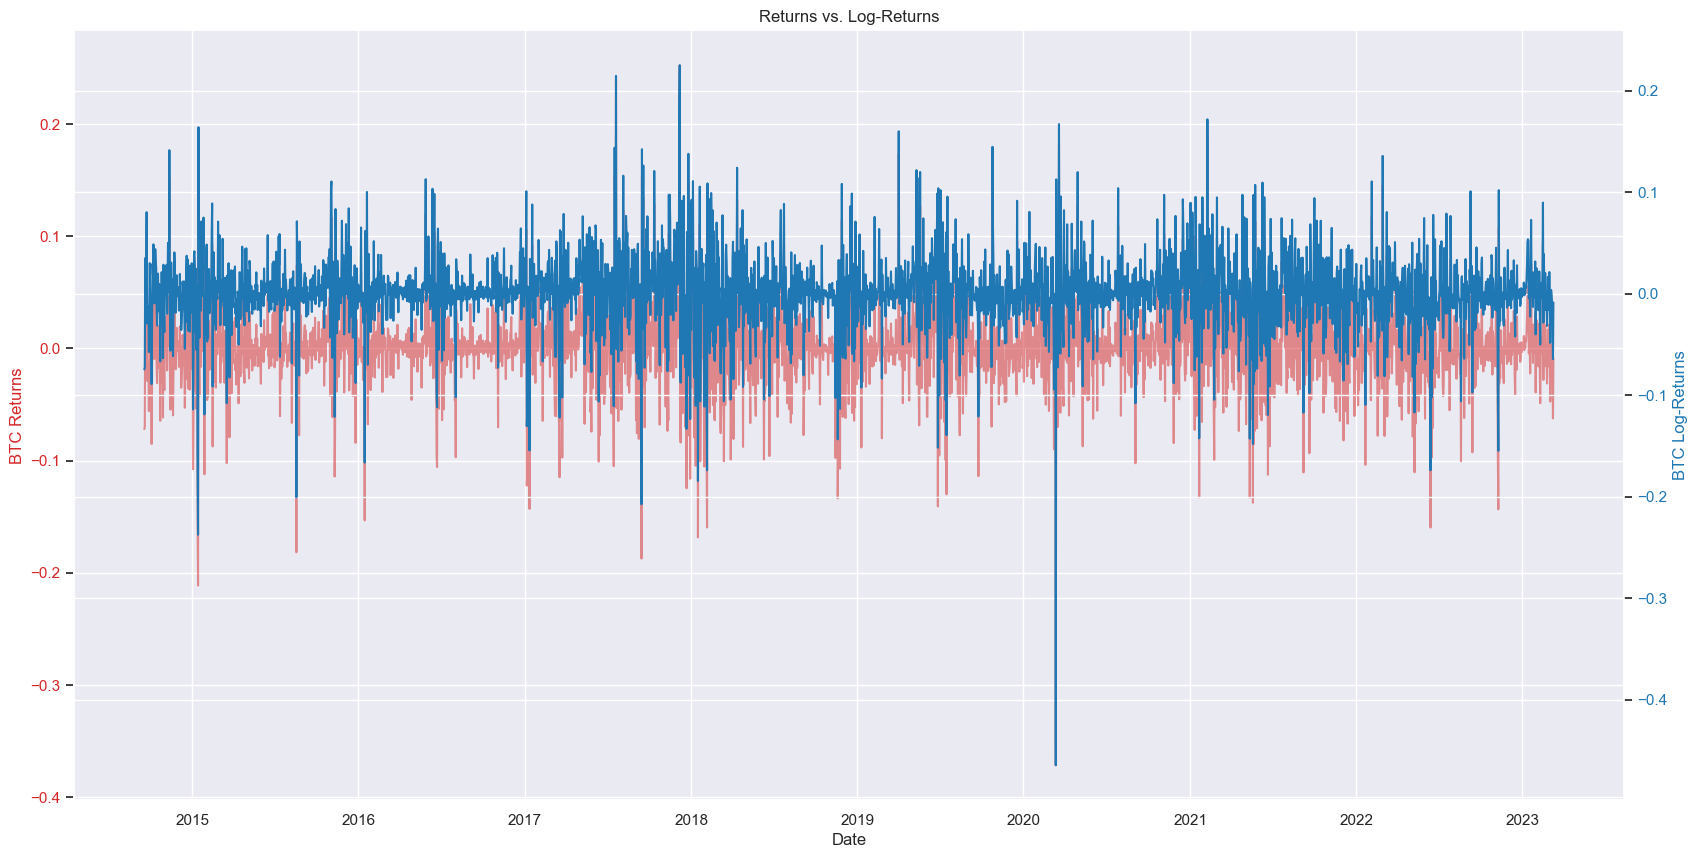

In [8]:
plot_2_graphes_v2(btc['Returns'], btc['Log_Returns'],title1 = 'BTC Returns',title2 = 'BTC Log-Returns',plot_title='Returns vs. Log-Returns')

Relative Strength Index (RSI)¶

Definition From Paper:

RSI is a popular momentum indicator that determines whether the stock is overbought or oversold. A stock is said to be overbought when the demand unjustifiably pushes the price upwards. This condition is generally interpreted as a sign that the stock is overvalued, and the price is likely to go down. A stock is said to be oversold when the price goes down sharply to a level below its true value. This is a result caused due to panic selling. RSI ranges from 0 to 100, and generally, when RSI is above 70, it may indicate that the stock is overbought and when RSI is below 30, it may indicate the stock is oversold.

Formula:

RSI = 100 - 100/(1+RS)

In [9]:
# Calculate the 14 day RSI
n = 14

# First make a copy of the data frame twice
up_df, down_df = btc[['Returns']].copy(), btc[['Returns']].copy() 
up_df.loc['Returns'] = up_df.loc[(up_df['Returns'] < 0), 'Returns'] = 0 # For up days, if the change is less than 0 set to 0.
down_df.loc['Returns'] = down_df.loc[(down_df['Returns'] > 0), 'Returns'] = 0 # For down days, if the change is greater than 0 
down_df['Returns'] = down_df['Returns'].abs() # We need change in price to be absolute

# Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are 
# given less weight compared to newer values.
ewma_up = up_df['Returns'].transform(lambda x: x.ewm(span = n).mean()) 
ewma_down = down_df['Returns'].transform(lambda x: x.ewm(span = n).mean())

# Calculate the Relative Strength
relative_strength = ewma_up / ewma_down # Calculate the Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

# Add the info to the data frame.
btc['down_days'] = down_df['Returns'] 
btc['up_days'] = up_df['Returns'] 
btc['RSI'] = relative_strength_index


Definition From Paper:

Stochastic Oscillator follows the speed or the momentum of the price. As a rule, momentum changes before the price changes. It measures the level of the closing price relative to the low-high range over a period of time.

Formula:

C = Current Closing Price

L14 = Lowest low over the past 14 days

H14 = Highest high over the past 14 days

K = 100 * (C-L14)/(H14-L14)

In [10]:
# Calculate the Stochastic Oscillator
n = 14

# Make a copy of the high and low column.
low_14, high_14 = btc[['Low']].copy(), btc[['High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['Low'].transform(lambda x: x.rolling(window = n).min()) 
high_14 = high_14['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((btc['Close'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
btc['Low_14'] = low_14 
btc['High_14'] = high_14 
btc['K_percent'] = k_percent


Moving Average Convergence Divergnece (MACD)

Definition From Paper:

EMA stands for Exponential Moving Average. When the MACD goes below the SingalLine, it indicates a sell signal. When it goes above the Signal Line, it indicates a buy signal.

Formula:

MACD = Moving Average Convergence Divergence

C = Closing Price

EMAn = n day Exponential Moving Average

MACD = EMA12(C) - EMA26(C)

SignalLine = EMA9(MACD)

In [11]:
# Calculate the MACD
ema_26 = btc['Close'].transform(lambda x: x.ewm(span = 26).mean()) 
ema_12 = btc['Close'].transform(lambda x: x.ewm(span = 12).mean()) 
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
btc['MACD'] = macd 
btc['MACD_EMA'] = ema_9_macd


Price Rate Of Change

Definition From Paper:

It measures the most recent change in price with respect to the price in n days ago.

PROCt = Return at time t

Ct = Closing Price at time t

PROCt = Ct-Ct-n/Ct-n

In [12]:
# Calculate the Price Rate of Change
n=9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
btc['ROC'] = btc['Close'].transform(lambda x: x.pct_change(periods = n)) 


In [13]:
btc = btc.drop(['Open','High','Low','Adj Close','Returns','down_days','up_days','MACD_EMA','Low_14','High_14'], axis = 1)
btc 

Close       Volume  Log_Returns        RSI  K_percent  \
Date                                                                       
2014-09-17    457.334015     21056800          NaN        NaN        NaN   
2014-09-18    424.440002     34483200    -0.074643   0.000000        NaN   
2014-09-19    394.795990     37919700    -0.072402   0.000000        NaN   
2014-09-20    408.903992     36863600     0.035111  23.777418        NaN   
2014-09-21    398.821014     26580100    -0.024968  19.992515        NaN   
...                  ...          ...          ...        ...        ...   
2023-03-06  22429.757812  17353192895    -0.000257  35.267357   7.882087   
2023-03-07  22219.769531  22765452204    -0.009406  31.777620   8.142203   
2023-03-08  21718.080078  22536575684    -0.022837  24.916690   0.350180   
2023-03-09  20363.021484  30364664171    -0.064425  14.757438   3.922405   
2023-03-10  20187.244141  39578257695    -0.008670  13.855600  13.145353   

                  MACD       ROC  
Date                              
2014-09-17    0.000000       NaN  
2014-09-18   -0.738007       NaN  
2014-09-19   -1.859626       NaN  
2014-09-20   -1.814822       NaN  
2014-09-21   -2.153494       NaN  
...                ...       ...  
2023-03-06  -52.088259 -0.032173  
2023-03-07 -109.951179 -0.056934  
2023-03-08 -194.053181 -0.076725  
2023-03-09 -365.829474 -0.120287  
2023-03-10 -510.265166 -0.146292  

[3097 rows x 7 columns]

In [14]:
#bitcoin-number-of-transactions
#https://data.nasdaq.com/data/BCHAIN/NTRAN-bitcoin-number-of-transactions
#BCHAIN-NTRAN.csv
btc_no_transactions = pd.read_csv('BCHAIN-NTRAN.csv')
btc_no_transactions = btc_no_transactions.rename(columns={'Value': 'btc_num_of_trans'})

# Set the 'Date' column as the index of the DataFrame
btc_no_transactions = btc_no_transactions.set_index('Date')

# Sort the DataFrame by the index (which is the 'Date' column)
btc_no_transactions = btc_no_transactions.sort_index()
btc_no_transactions = btc_no_transactions['2014-09-17':'2023-03-10']
btc_no_transactions_change = btc_no_transactions.pct_change()
btc_no_transactions_change = btc_no_transactions_change.set_index(btc.index)



In [15]:
btc['btc_no_transactions_change'] = btc_no_transactions_change

In [16]:
btc = btc['2015-07-01':'2023-03-10'] #choose the necessary date
btc

Close       Volume  Log_Returns        RSI  K_percent  \
Date                                                                       
2015-07-01    258.621002     27029800    -0.017064  68.415439  66.380618   
2015-07-02    255.412003     21551900    -0.012486  61.176632  54.712376   
2015-07-03    256.335999     19033800     0.003611  62.511035  58.072117   
2015-07-04    260.885986     15620400     0.017594  68.617634  74.616325   
2015-07-05    271.912994     44156100     0.041399  78.320490  92.404976   
...                  ...          ...          ...        ...        ...   
2023-03-06  22429.757812  17353192895    -0.000257  35.267357   7.882087   
2023-03-07  22219.769531  22765452204    -0.009406  31.777620   8.142203   
2023-03-08  21718.080078  22536575684    -0.022837  24.916690   0.350180   
2023-03-09  20363.021484  30364664171    -0.064425  14.757438   3.922405   
2023-03-10  20187.244141  39578257695    -0.008670  13.855600  13.145353   

                  MACD       ROC  btc_no_transactions_change  
Date                                                          
2015-07-01    5.824416  0.047091                   -0.130250  
2015-07-02    5.789646  0.045502                    0.023929  
2015-07-03    5.770135  0.065780                   -0.065499  
2015-07-04    6.052054  0.074494                   -0.215890  
2015-07-05    7.083609  0.116255                    0.491840  
...                ...       ...                         ...  
2023-03-06  -52.088259 -0.032173                    0.102492  
2023-03-07 -109.951179 -0.056934                    0.145771  
2023-03-08 -194.053181 -0.076725                   -0.192191  
2023-03-09 -365.829474 -0.120287                    0.151665  
2023-03-10 -510.265166 -0.146292                   -0.022324  

[2810 rows x 8 columns]

In [17]:
#Global Economic Policy Uncertainty Index: PPP-Adjusted GDP
#https://fred.stlouisfed.org/series/GEPUPPP

GEPUPPP = pd.read_excel('GEPUIPP.xlsx') #only monthly data
GEPUPPP = GEPUPPP.fillna(method='ffill') #interploation with the same value 
GEPUPPP = GEPUPPP.set_index(btc.index)

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['GEPUPPP'] = GEPUPPP['GEPUPPP']

In [18]:
#CBOE Volatility Index: VIX: https://fred.stlouisfed.org/series/VIXCLS
vix = pd.read_excel('VIXCLS.xlsx') #daily data
vix = vix.set_index('observation_date')
vix = vix['VIXCLS'].interpolate(method='linear')
vix = pd.DataFrame(vix['2015-07-01':'2023-03-10'])

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['vix'] = vix

In [19]:
#wikipedia searches: https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2015-07-01&end=2023-03-10&pages=Bitcoin
wiki = pd.read_csv('wikipedia_searches.csv') #daily data
wiki = pd.DataFrame(wiki['Bitcoin'].pct_change())
wiki = wiki.set_index(btc.index)

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['wiki'] = wiki

In [20]:
#Federal Funds Effective Rate https://fred.stlouisfed.org/series/DFF
fed_fund_eff_rate =pd.read_csv('Federal Funds Effective Rate.csv') #daly data
fed_fund_eff_rate

fed_fund_eff_rate = fed_fund_eff_rate.set_index(btc.index)

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['fed_fund_eff_rate'] = fed_fund_eff_rate['DFF']


In [21]:
#glassnode data
volume_mined_sum = pd.read_csv('volume_mined_sum.csv')
volume_mined_sum.index = volume_mined_sum['t']
volume_mined_sum = volume_mined_sum['2015-07-01':'2023-03-10']
volume_mined_sum = volume_mined_sum.set_index(btc.index)
btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['volume_mined_sum'] = volume_mined_sum['volume_mined_sum']

#evtl probieren....
btc['volume_mined_sum_pct_change'] = btc['volume_mined_sum'].pct_change()


In [22]:
hash_rate_mean = pd.read_csv('hash_rate_mean.csv')

#glassnode data
hash_rate_mean = pd.read_csv('hash_rate_mean.csv')
hash_rate_mean.index = hash_rate_mean['t']
hash_rate_mean = hash_rate_mean['2015-07-01':'2023-03-10']
hash_rate_mean = hash_rate_mean.set_index(btc.index)

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['hash_rate_mean'] = hash_rate_mean['hash_rate_mean']
btc['hash_rate_mean_pct_change'] = btc['hash_rate_mean'].pct_change()


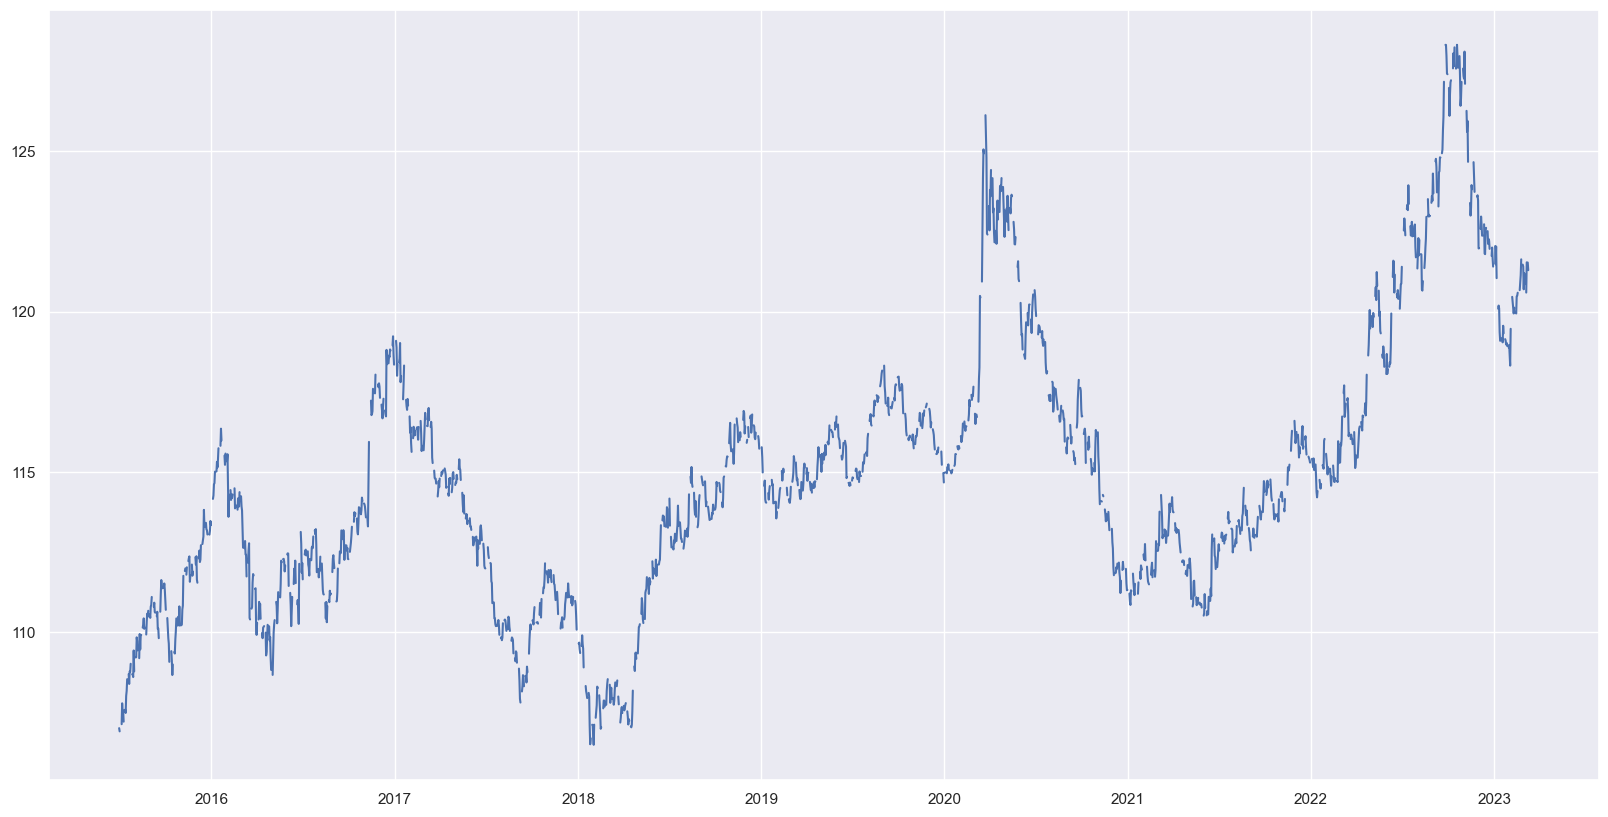

In [23]:
#Nominal Broad U.S. Dollar Index https://fred.stlouisfed.org/series/DTWEXBGS (Trade-weighted US dollar index )
#we have to fill with interpolation
Nom_Broad_USD_Index = pd.read_excel("Nominal Broad U.S. Dollar Index.xlsx")
Nom_Broad_USD_Index.index = Nom_Broad_USD_Index['Date']
plt.plot(Nom_Broad_USD_Index['DTWEXBGS']) #we had to do linear interpolation

In [24]:
# Fill missing values using interpolation (linear)
Nom_Broad_USD_Index_inter = Nom_Broad_USD_Index['DTWEXBGS'].interpolate(method='linear')
Nom_Broad_USD_Index_inter = pd.DataFrame(Nom_Broad_USD_Index_inter['2015-07-01':'2023-03-10'])
Nom_Broad_USD_Index_inter = Nom_Broad_USD_Index_inter.set_index(btc.index)
Nom_Broad_USD_Index_inter_change = Nom_Broad_USD_Index_inter.pct_change() #create returns

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['Nom_Broad_USD_Index_inter'] = Nom_Broad_USD_Index_inter['DTWEXBGS']
btc['Nom_Broad_USD_Index_inter_change'] = Nom_Broad_USD_Index_inter_change['DTWEXBGS']


In [25]:
#volume_sum_change
btc['Volume_change'] = btc['Volume'].pct_change()


In [26]:
Price_Commodities = pd.read_excel("Price Commodities_.xlsx") 

In [27]:
SP_GSCI_Energy_Tot_Ret = Price_Commodities['S&P GSCI Energy_Total Return']
SP_GSCI_Energy_Tot_Ret = Price_Commodities['S&P GSCI Energy_Total Return'].interpolate(method='linear')
SP_GSCI_Energy_Tot_Ret = pd.DataFrame(SP_GSCI_Energy_Tot_Ret).pct_change()
SP_GSCI_Energy_Tot_Ret = SP_GSCI_Energy_Tot_Ret.set_index(btc.index)

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['SP_GSCI_Energy_Tot_Ret'] = SP_GSCI_Energy_Tot_Ret

In [28]:
SP_GSCI_Gold_Tot_Ret = Price_Commodities['S&P GSCI Gold_Total Return']
SP_GSCI_Gold_Tot_Ret = Price_Commodities['S&P GSCI Gold_Total Return'].interpolate(method='linear')
SP_GSCI_Gold_Tot_Ret = pd.DataFrame(SP_GSCI_Gold_Tot_Ret).pct_change() 
SP_GSCI_Gold_Tot_Ret = SP_GSCI_Gold_Tot_Ret.set_index(btc.index)

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['SP_GSCI_Gold_Tot_Ret'] = SP_GSCI_Gold_Tot_Ret


In [29]:
SP_Global_BMI_Tot_Ret = Price_Commodities['S&P Global BMI_Total Return']
SP_Global_BMI_Tot_Ret = Price_Commodities['S&P Global BMI_Total Return'].interpolate(method='linear')
SP_Global_BMI_Tot_Ret = pd.DataFrame(SP_Global_BMI_Tot_Ret).pct_change()
 
SP_Global_BMI_Tot_Ret = SP_Global_BMI_Tot_Ret.set_index(btc.index)

btc = btc.copy() # This creates a copy of the btc DataFrame to avoid warning message
btc['SP_Global_BMI_Tot_Ret'] = SP_Global_BMI_Tot_Ret


In [30]:
features = btc.dropna()
features = features.drop(['Nom_Broad_USD_Index_inter','hash_rate_mean','volume_mined_sum','Volume'],axis = 1)
features

Close  Log_Returns        RSI  K_percent        MACD  \
Date                                                                      
2015-07-02    255.412003    -0.012486  61.176632  54.712376    5.789646   
2015-07-03    256.335999     0.003611  62.511035  58.072117    5.770135   
2015-07-04    260.885986     0.017594  68.617634  74.616325    6.052054   
2015-07-05    271.912994     0.041399  78.320490  92.404976    7.083609   
2015-07-06    269.029999    -0.010659  71.887372  77.353806    7.581100   
...                  ...          ...        ...        ...         ...   
2023-03-06  22429.757812    -0.000257  35.267357   7.882087  -52.088259   
2023-03-07  22219.769531    -0.009406  31.777620   8.142203 -109.951179   
2023-03-08  21718.080078    -0.022837  24.916690   0.350180 -194.053181   
2023-03-09  20363.021484    -0.064425  14.757438   3.922405 -365.829474   
2023-03-10  20187.244141    -0.008670  13.855600  13.145353 -510.265166   

                 ROC  btc_no_transactions_change     GEPUPPP     vix  \
Date                                                                   
2015-07-02  0.045502                    0.023929  128.857764  16.790   
2015-07-03  0.065780                   -0.065499  128.857764  16.845   
2015-07-04  0.074494                   -0.215890  128.857764  16.900   
2015-07-05  0.116255                    0.491840  128.857764  16.955   
2015-07-06  0.071875                    0.147152  128.857764  17.010   
...              ...                         ...         ...     ...   
2023-03-06 -0.032173                    0.102492  264.330834  18.610   
2023-03-07 -0.056934                    0.145771  264.330834  19.590   
2023-03-08 -0.076725                   -0.192191  264.330834  19.110   
2023-03-09 -0.120287                    0.151665  264.330834  22.610   
2023-03-10 -0.146292                   -0.022324  264.330834  24.800   

                wiki  fed_fund_eff_rate  volume_mined_sum_pct_change  \
Date                                                                   
2015-07-02 -0.243498               0.13                     0.140741   
2015-07-03 -0.152520               0.13                     0.045455   
2015-07-04  0.077043               0.13                    -0.055901   
2015-07-05 -0.028501               0.13                    -0.065789   
2015-07-06  0.180741               0.13                     0.274648   
...              ...                ...                          ...   
2023-03-06  0.144743               4.57                    -0.148387   
2023-03-07  0.076356               4.57                     0.250000   
2023-03-08 -0.089201               4.57                    -0.193939   
2023-03-09  0.062464               4.57                     0.015038   
2023-03-10  0.121756               4.57                     0.007407   

            hash_rate_mean_pct_change  Nom_Broad_USD_Index_inter_change  \
Date                                                                      
2015-07-02                   0.155132                     -9.298188e-04   
2015-07-03                   0.037984                      5.231006e-04   
2015-07-04                  -0.045281                      5.228271e-04   
2015-07-05                  -0.083265                      5.225539e-04   
2015-07-06                   0.278871                      5.222810e-04   
...                               ...                               ...   
2023-03-06                  -0.169201                     -7.131752e-04   
2023-03-07                   0.250673                      7.807129e-03   
2023-03-08                  -0.176546                     -4.772233e-05   
2023-03-09                   0.000759                      8.228380e-07   
2023-03-10                   0.005327                     -1.960821e-03   

            Volume_change  SP_GSCI_Energy_Tot_Ret  SP_GSCI_Gold_Tot_Ret  \
Date                                                                      
2015-07-02      -0.202662                0.

In [31]:
features.describe()

Close  Log_Returns          RSI    K_percent         MACD  \
count   2809.000000  2809.000000  2809.000000  2809.000000  2809.000000   
mean   14369.951577     0.001551    55.083702    55.823930    56.513053   
std    16309.175085     0.038506    17.914051    30.178770  1011.668425   
min      210.494995    -0.464730     5.342375     0.000000 -5053.274080   
25%     2304.979980    -0.012836    42.132675    29.946650  -133.718046   
50%     8223.679688     0.001817    54.075401    57.365334     7.506406   
75%    19796.808594     0.017582    68.292162    84.607732   251.260697   
max    67566.828125     0.225119    98.422025   100.000000  5273.808690   

               ROC  btc_no_transactions_change      GEPUPPP          vix  \
count  2809.000000                 2809.000000  2809.000000  2809.000000   
mean      0.021479                    0.008152   230.356018    19.026524   
std       0.120347                    0.128660    70.670835     7.906197   
min      -0.437205                   -0.429142   100.659273     9.140000   
25%      -0.041658                   -0.075755   169.504123    13.230000   
50%       0.011583                   -0.007402   229.699152    17.220000   
75%       0.079538                    0.068651   278.772533    22.750000   
max       0.779506                    0.748219   437.247257    82.690000   

              wiki  fed_fund_eff_rate  volume_mined_sum_pct_change  \
count  2809.000000        2809.000000                  2809.000000   
mean      0.022624           1.098163                     0.007203   
std       0.349106           1.097583                     0.126403   
min      -0.885304           0.040000                    -0.496552   
25%      -0.084625           0.100000                    -0.077720   
50%      -0.007886           0.820000                    -0.005650   
75%       0.078583           1.850000                     0.081481   
max      12.406795           4.580000                     0.811765   

       hash_rate_mean_pct_change  Nom_Broad_USD_Index_inter_change  \
count                2809.000000                       2809.000000   
mean                    0.009794                          0.000048   
std                     0.124070                          0.002491   
min                    -0.390864                         -0.020668   
25%                    -0.075118                         -0.000963   
50%                     0.001516                          0.000012   
75%                     0.081524                          0.001076   
max                     0.821848                          0.018920   

       Volume_change  SP_GSCI_Energy_Tot_Ret  SP_GSCI_Gold_Tot_Ret  \
count    2809.000000             2809.000000           2809.000000   
mean        0.045084                0.000143              0.000166   
std         0.334077                0.018764              0.007210   
min        -0.869188               -0.260432             -0.046519   
25%        -0.137625               -0.006514             -0.002457   
50%        -0.008393                0.000079              0.000000   
75%         0.163888                0.007072              0.002782   
max         5.439003                0.173306              0.057598   

       SP_Global_BMI_Tot_Ret  
count            2809.000000  
mean                0.000215  
std                 0.007420  
min                -0.095247  
25%                -0.002144  
50%                 0.000314  
75%                 0.002933  
max                 0.082914

## 2.1 Create Label (ADF Data calculated in R)

In [36]:
adf_data_timestemps = pd.read_csv('datestamp_results_old.csv')

In [37]:
# Filter rows with Duration greater than 2
filtered_adf = adf_data_timestemps[adf_data_timestemps['Duration'] > 0].copy() #we took all signals thats why 0!

# Convert date columns to datetime format
filtered_adf['Start'] = pd.to_datetime(filtered_adf['Start'])
filtered_adf['Peak'] = pd.to_datetime(filtered_adf['Peak'])
filtered_adf['End'] = pd.to_datetime(filtered_adf['End'])

filtered_adf_for_plot=filtered_adf
filtered_adf_for_plot

Start       Peak        End  Duration    Signal  Ongoing
0  2015-11-03 2015-11-03 2015-11-06         3  positive    False
1  2015-11-07 2015-11-07 2015-11-08         1  positive    False
2  2016-06-03 2016-06-06 2016-06-07         4  positive    False
3  2016-06-08 2016-06-08 2016-06-09         1  positive    False
4  2016-06-11 2016-06-16 2016-06-21        10  positive    False
5  2016-12-23 2016-12-23 2016-12-25         2  positive    False
6  2016-12-26 2017-01-04 2017-01-06        11  positive    False
7  2017-05-04 2017-06-10 2017-07-10        67  positive    False
8  2017-07-20 2017-07-20 2017-07-21         1  positive    False
9  2017-07-22 2017-07-22 2017-07-25         3  positive    False
10 2017-07-28 2017-07-28 2017-07-29         1  positive    False
11 2017-07-31 2017-07-31 2017-08-01         1  positive    False
12 2017-08-04 2017-09-01 2017-09-14        41  positive    False
13 2017-09-18 2017-09-18 2017-09-19         1  positive    False
14 2017-09-27 2017-12-06 2017-12-22        86  positive    False
15 2017-12-23 2017-12-23 2017-12-24         1  positive    False
16 2017-12-26 2017-12-26 2017-12-28         2  positive    False
17 2018-01-02 2018-01-05 2018-01-08         6  positive    False
18 2019-05-10 2019-05-15 2019-05-18         8  positive    False
19 2019-05-19 2019-05-19 2019-05-22         3  positive    False
20 2019-05-24 2019-05-27 2019-05-30         6  positive    False
21 2019-05-31 2019-06-02 2019-06-03         3  positive    False
22 2019-06-21 2019-06-26 2019-07-01        10  positive    False
23 2019-07-03 2019-07-03 2019-07-04         1  positive    False
24 2019-07-08 2019-07-09 2019-07-11         3  positive    False
25 2020-11-05 2020-11-06 2020-11-07         2  negative    False
26 2020-11-12 2020-11-13 2020-11-14         2  positive    False
27 2020-11-16 2020-11-20 2020-11-26        10  positive    False
28 2020-11-30 2020-11-30 2020-12-01         1  positive    False
29 2020-12-03 2020-12-03 2020-12-04         1  positive    False
30 2020-12-16 2021-01-08 2021-01-21        36  positive    False
31 2021-01-22 2021-01-22 2021-01-27         5  positive    False
32 2021-01-28 2021-02-21 2021-05-12       104  positive    False
33 2021-10-19 2021-10-20 2021-10-21         2  positive    False
34 2021-11-08 2021-11-08 2021-11-10         2  positive    False

In [38]:
filtered_adf_for_plot

Start       Peak        End  Duration    Signal  Ongoing
0  2015-11-03 2015-11-03 2015-11-06         3  positive    False
1  2015-11-07 2015-11-07 2015-11-08         1  positive    False
2  2016-06-03 2016-06-06 2016-06-07         4  positive    False
3  2016-06-08 2016-06-08 2016-06-09         1  positive    False
4  2016-06-11 2016-06-16 2016-06-21        10  positive    False
5  2016-12-23 2016-12-23 2016-12-25         2  positive    False
6  2016-12-26 2017-01-04 2017-01-06        11  positive    False
7  2017-05-04 2017-06-10 2017-07-10        67  positive    False
8  2017-07-20 2017-07-20 2017-07-21         1  positive    False
9  2017-07-22 2017-07-22 2017-07-25         3  positive    False
10 2017-07-28 2017-07-28 2017-07-29         1  positive    False
11 2017-07-31 2017-07-31 2017-08-01         1  positive    False
12 2017-08-04 2017-09-01 2017-09-14        41  positive    False
13 2017-09-18 2017-09-18 2017-09-19         1  positive    False
14 2017-09-27 2017-12-06 2017-12-22        86  positive    False
15 2017-12-23 2017-12-23 2017-12-24         1  positive    False
16 2017-12-26 2017-12-26 2017-12-28         2  positive    False
17 2018-01-02 2018-01-05 2018-01-08         6  positive    False
18 2019-05-10 2019-05-15 2019-05-18         8  positive    False
19 2019-05-19 2019-05-19 2019-05-22         3  positive    False
20 2019-05-24 2019-05-27 2019-05-30         6  positive    False
21 2019-05-31 2019-06-02 2019-06-03         3  positive    False
22 2019-06-21 2019-06-26 2019-07-01        10  positive    False
23 2019-07-03 2019-07-03 2019-07-04         1  positive    False
24 2019-07-08 2019-07-09 2019-07-11         3  positive    False
25 2020-11-05 2020-11-06 2020-11-07         2  negative    False
26 2020-11-12 2020-11-13 2020-11-14         2  positive    False
27 2020-11-16 2020-11-20 2020-11-26        10  positive    False
28 2020-11-30 2020-11-30 2020-12-01         1  positive    False
29 2020-12-03 2020-12-03 2020-12-04         1  positive    False
30 2020-12-16 2021-01-08 2021-01-21        36  positive    False
31 2021-01-22 2021-01-22 2021-01-27         5  positive    False
32 2021-01-28 2021-02-21 2021-05-12       104  positive    False
33 2021-10-19 2021-10-20 2021-10-21         2  positive    False
34 2021-11-08 2021-11-08 2021-11-10         2  positive    False

In [39]:
# Define the date range
start_date = datetime(2013, 3, 12)
end_date = datetime(2023, 3, 12)

# Calculate the number of days in the range
num_days = (end_date - start_date).days + 1

# Create a list of dates within the range
date_range = [start_date + timedelta(days=i) for i in range(num_days)]

# Initialize the signal list with zeros
signal_list = [0] * num_days

# Loop through the dataframe and update the signal_list based on the 'Signal' column
for index, row in filtered_adf_for_plot.iterrows():
    if row['Signal'] == 'positive':
        for i in range(num_days):
            if row['Start'] <= date_range[i] <= row['Peak']:
                signal_list[i] = 1

# Create the final DataFrame with date_range as index and signal_list as the column
signal_df = pd.DataFrame(signal_list, columns=['Signal'], index=date_range)


In [40]:
bitcoin_price = pd.DataFrame(features['Close'])
label = signal_df['2015-07-02':'2023-03-10']
# Reindex signal_df to match the index of bitcoin_price
label_reindexed = label.reindex(bitcoin_price.index)

In [41]:
label_reindexed

Signal
Date              
2015-07-02       0
2015-07-03       0
2015-07-04       0
2015-07-05       0
2015-07-06       0
...            ...
2023-03-06       0
2023-03-07       0
2023-03-08       0
2023-03-09       0
2023-03-10       0

[2809 rows x 1 columns]

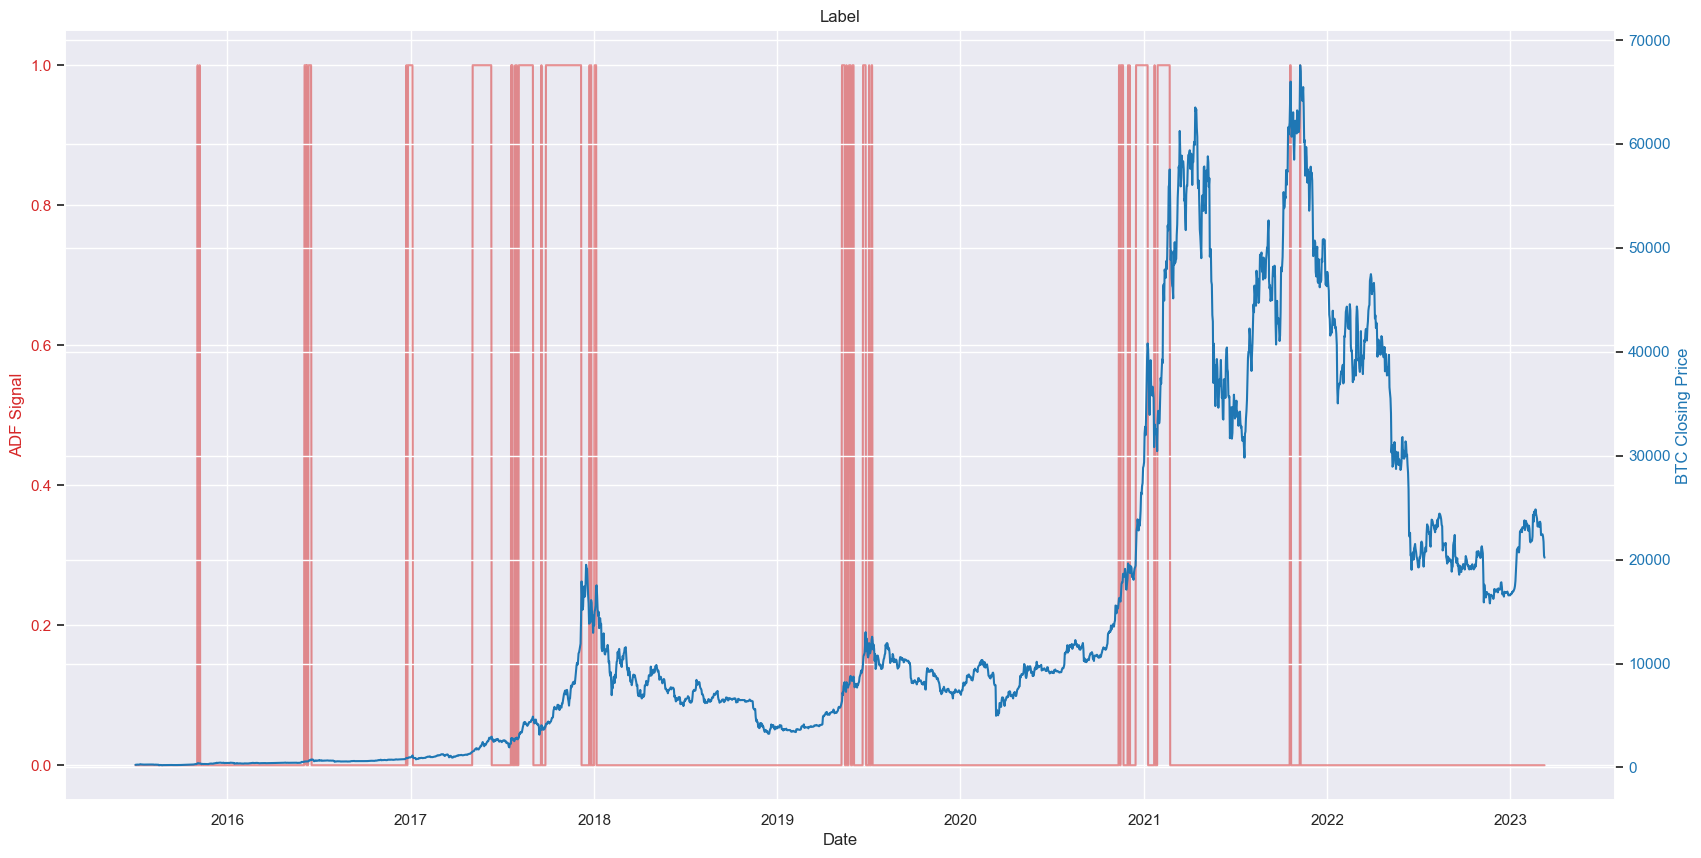

In [42]:

plot_2_graphes(label_reindexed, bitcoin_price,title1 = 'ADF Signal',title2 = 'BTC Closing Price',plot_title='Label')


In [43]:
#Create pred signal foor the models shift
label = label_reindexed.shift(-1).dropna()

In [44]:
# start day of testing data set 2021-08-25 
filtered_adf_testset = filtered_adf[33:]

filtered_adf_testset

Start       Peak        End  Duration    Signal  Ongoing
33 2021-10-19 2021-10-20 2021-10-21         2  positive    False
34 2021-11-08 2021-11-08 2021-11-10         2  positive    False

In [45]:
#Label Bubbels characteristics
mean_duration_label = np.mean(filtered_adf_testset['Duration'])
max_duration_label = np.max(filtered_adf_testset['Duration'])

# Convert Start column to datetime if it's not
filtered_adf['Start'] = pd.to_datetime(filtered_adf_testset['Start'])

# Calculate the difference between the current and the next bubble
filtered_adf['Period_Between_Bubbles'] = filtered_adf_testset['Start'].shift(-1) - filtered_adf_testset['Start']

# Compute the mean difference
mean_period_label = filtered_adf['Period_Between_Bubbles'].mean()

table_label = pd.DataFrame({
    'Mean_Duration': [mean_duration_label],
    'Max_Duration': [max_duration_label],
    'Mean_Period_Between_Bubbles': [mean_period_label]
})

# Print the table
print(table_label)

   Mean_Duration  Max_Duration Mean_Period_Between_Bubbles
0            2.0             2                     20 days


In [47]:
features = features[:'2023-03-09']
features['Pred_Signal'] = label.copy()

In [48]:
features.to_csv('model_features.csv')

### 2.2 Descriptive Statistic and Data Analysis (only Price so far)

In [108]:
# Concatenate the features and the target variable into a single DataFrame
corr_dat = pd.concat([features, label_reindexed], axis=1)

# Rename the target column to 'peak_indicator'
corr_dat.rename(columns={'Signal': 'peak_indicator'}, inplace=True)

# Calculate the correlation matrix
correlation_matrix = corr_dat.corr(method='pearson')

# Get the correlation values for the target variable (peak_indicator)
correlation_with_target = correlation_matrix['peak_indicator'].sort_values(ascending=False)

# Remove the peak_indicator itself from the list
correlation_with_target = correlation_with_target.drop('peak_indicator')

# Print the correlation values for each feature
print(correlation_with_target)


Pred_Signal                         0.854878
ROC                                 0.404821
RSI                                 0.375644
K_percent                           0.307642
MACD                                0.227903
Log_Returns                         0.218720
Volume_change                       0.059589
wiki                                0.032669
btc_no_transactions_change          0.029040
hash_rate_mean_pct_change           0.020688
SP_GSCI_Gold_Tot_Ret                0.020683
SP_Global_BMI_Tot_Ret               0.020681
SP_GSCI_Energy_Tot_Ret              0.018979
volume_mined_sum_pct_change         0.016262
Nom_Broad_USD_Index_inter_change   -0.027968
Close                              -0.038940
fed_fund_eff_rate                  -0.053571
GEPUPPP                            -0.121299
vix                                -0.178776
Name: peak_indicator, dtype: float64


In [109]:
correlation_matrix

Close  Log_Returns       RSI  K_percent  \
Close                             1.000000    -0.006629 -0.067847  -0.039644   
Log_Returns                      -0.006629     1.000000  0.441876   0.410310   
RSI                              -0.067847     0.441876  1.000000   0.903808   
K_percent                        -0.039644     0.410310  0.903808   1.000000   
MACD                              0.158335     0.064676  0.434045   0.347198   
ROC                              -0.014186     0.333729  0.816980   0.741797   
btc_no_transactions_change        0.000824     0.029874  0.032290   0.037400   
GEPUPPP                           0.222017    -0.018816 -0.062827  -0.054184   
vix                               0.217540    -0.058034 -0.171703  -0.141296   
wiki                             -0.024492     0.006803  0.010970   0.005041   
fed_fund_eff_rate                -0.197807    -0.024383 -0.095275  -0.106028   
volume_mined_sum_pct_change      -0.000679    -0.021130 -0.000822   0.002239   
hash_rate_mean_pct_change        -0.006488    -0.018951  0.000911   0.002409   
Nom_Broad_USD_Index_inter_change  0.003430    -0.101010 -0.084068  -0.107301   
Volume_change                    -0.018977     0.034443  0.043807   0.036405   
SP_GSCI_Energy_Tot_Ret            0.045716     0.074300  0.070327   0.086949   
SP_GSCI_Gold_Tot_Ret             -0.005160     0.076060  0.051976   0.061570   
SP_Global_BMI_Tot_Ret             0.000440     0.210452  0.141866   0.162079   
Pred_Signal                      -0.046205     0.144622  0.345828   0.283476   
peak_indicator                   -0.038940     0.218720  0.375644   0.307642   

                                      MACD       ROC  \
Close                             0.158335 -0.014186   
Log_Returns                       0.064676  0.333729   
RSI                               0.434045  0.816980   
K_percent                         0.347198  0.741797   
MACD                              1.000000  0.420235   
ROC                               0.420235  1.000000   
btc_no_transactions_change       -0.000329  0.024317   
GEPUPPP                           0.002985 -0.050942   
vix                              -0.132057 -0.157237   
wiki                              0.008721  0.023299   
fed_fund_eff_rate                -0.050833 -0.062559   
volume_mined_sum_pct_change      -0.008410 -0.000607   
hash_rate_mean_pct_change         0.001786  0.002399   
Nom_Broad_USD_Index_inter_change -0.015450 -0.075183   
Volume_change                     0.015340  0.039938   
SP_GSCI_Energy_Tot_Ret            0.011627  0.078439   
SP_GSCI_Gold_Tot_Ret              0.006070  0.056707   
SP_Global_BMI_Tot_Ret             0.040226  0.131411   
Pred_Signal                       0.211683  0.362957   
peak_indicator                    0.227903  0.404821   

                                  btc_no_transactions_change   GEPUPPP  \
Close                                               0.000824  0.222017   
Log_Returns                                         0.029874 -0.018816   
RSI                                                 0.032290 -0.062827   
K_percent                                           0.037400 -0.054184   
MACD                                               -0.000329  0.002985   
ROC                                                 0.024317 -0.050942   
btc_no_transactions_change                          1.000000 -0.009947   
GEPUPPP                                            -0.009947  1.000000   
vix                                                 0.006190  0.558961   
wiki                                                0.135669 -0.028555   
fed_fund_eff_rate                                  -0.006103  0.151273   
volume_mined_sum_pct_change                         0.337380 -0.006199   
hash_rate_mean_pct_change                           0.319325 -0.012072   
Nom_Broad_USD_Index_inter_change                   -0.012257 -0.032244   
Volume_change                                       0.259729 -0.03686

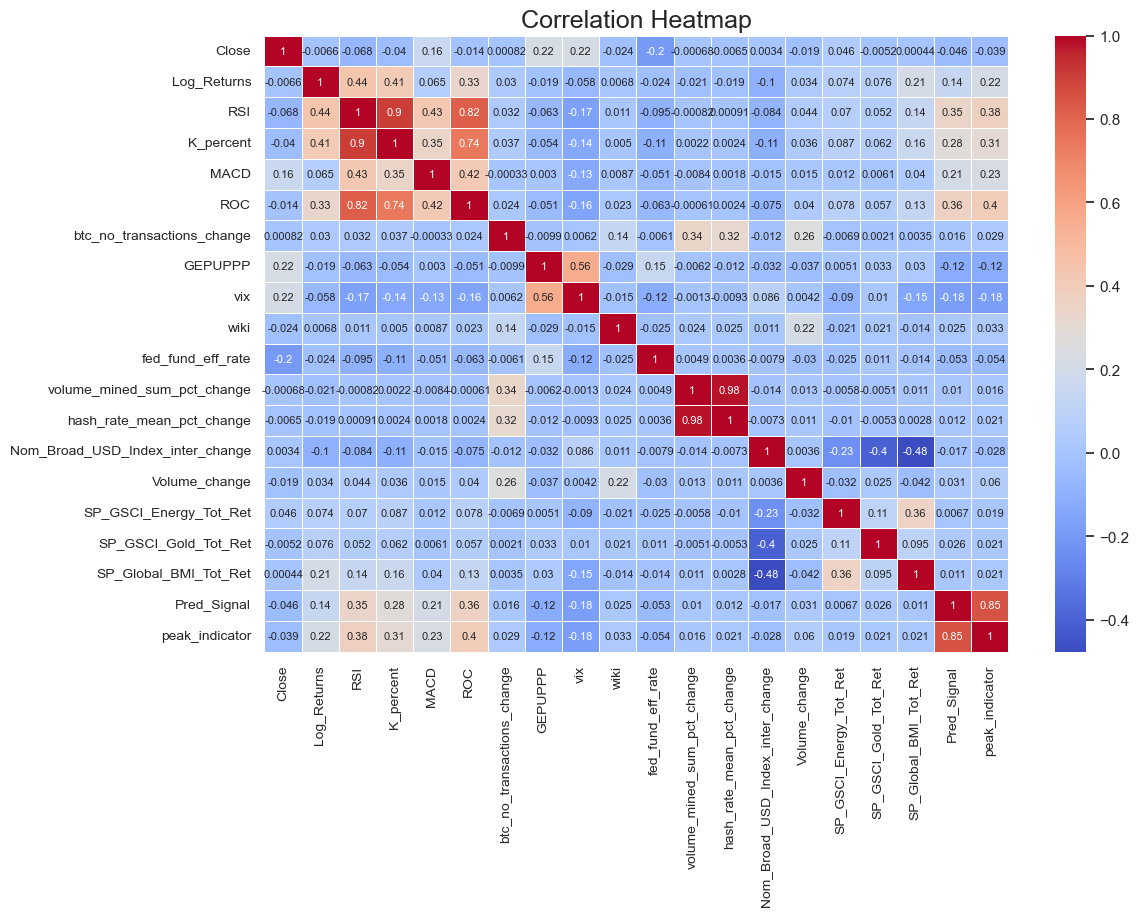

In [110]:
# Create a heatmap using Seaborn with bigger font size
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Set the title of the heatmap
plt.title('Correlation Heatmap', fontsize=18)

# Set the font size for the axes labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=90)

# Show the plot
plt.show()


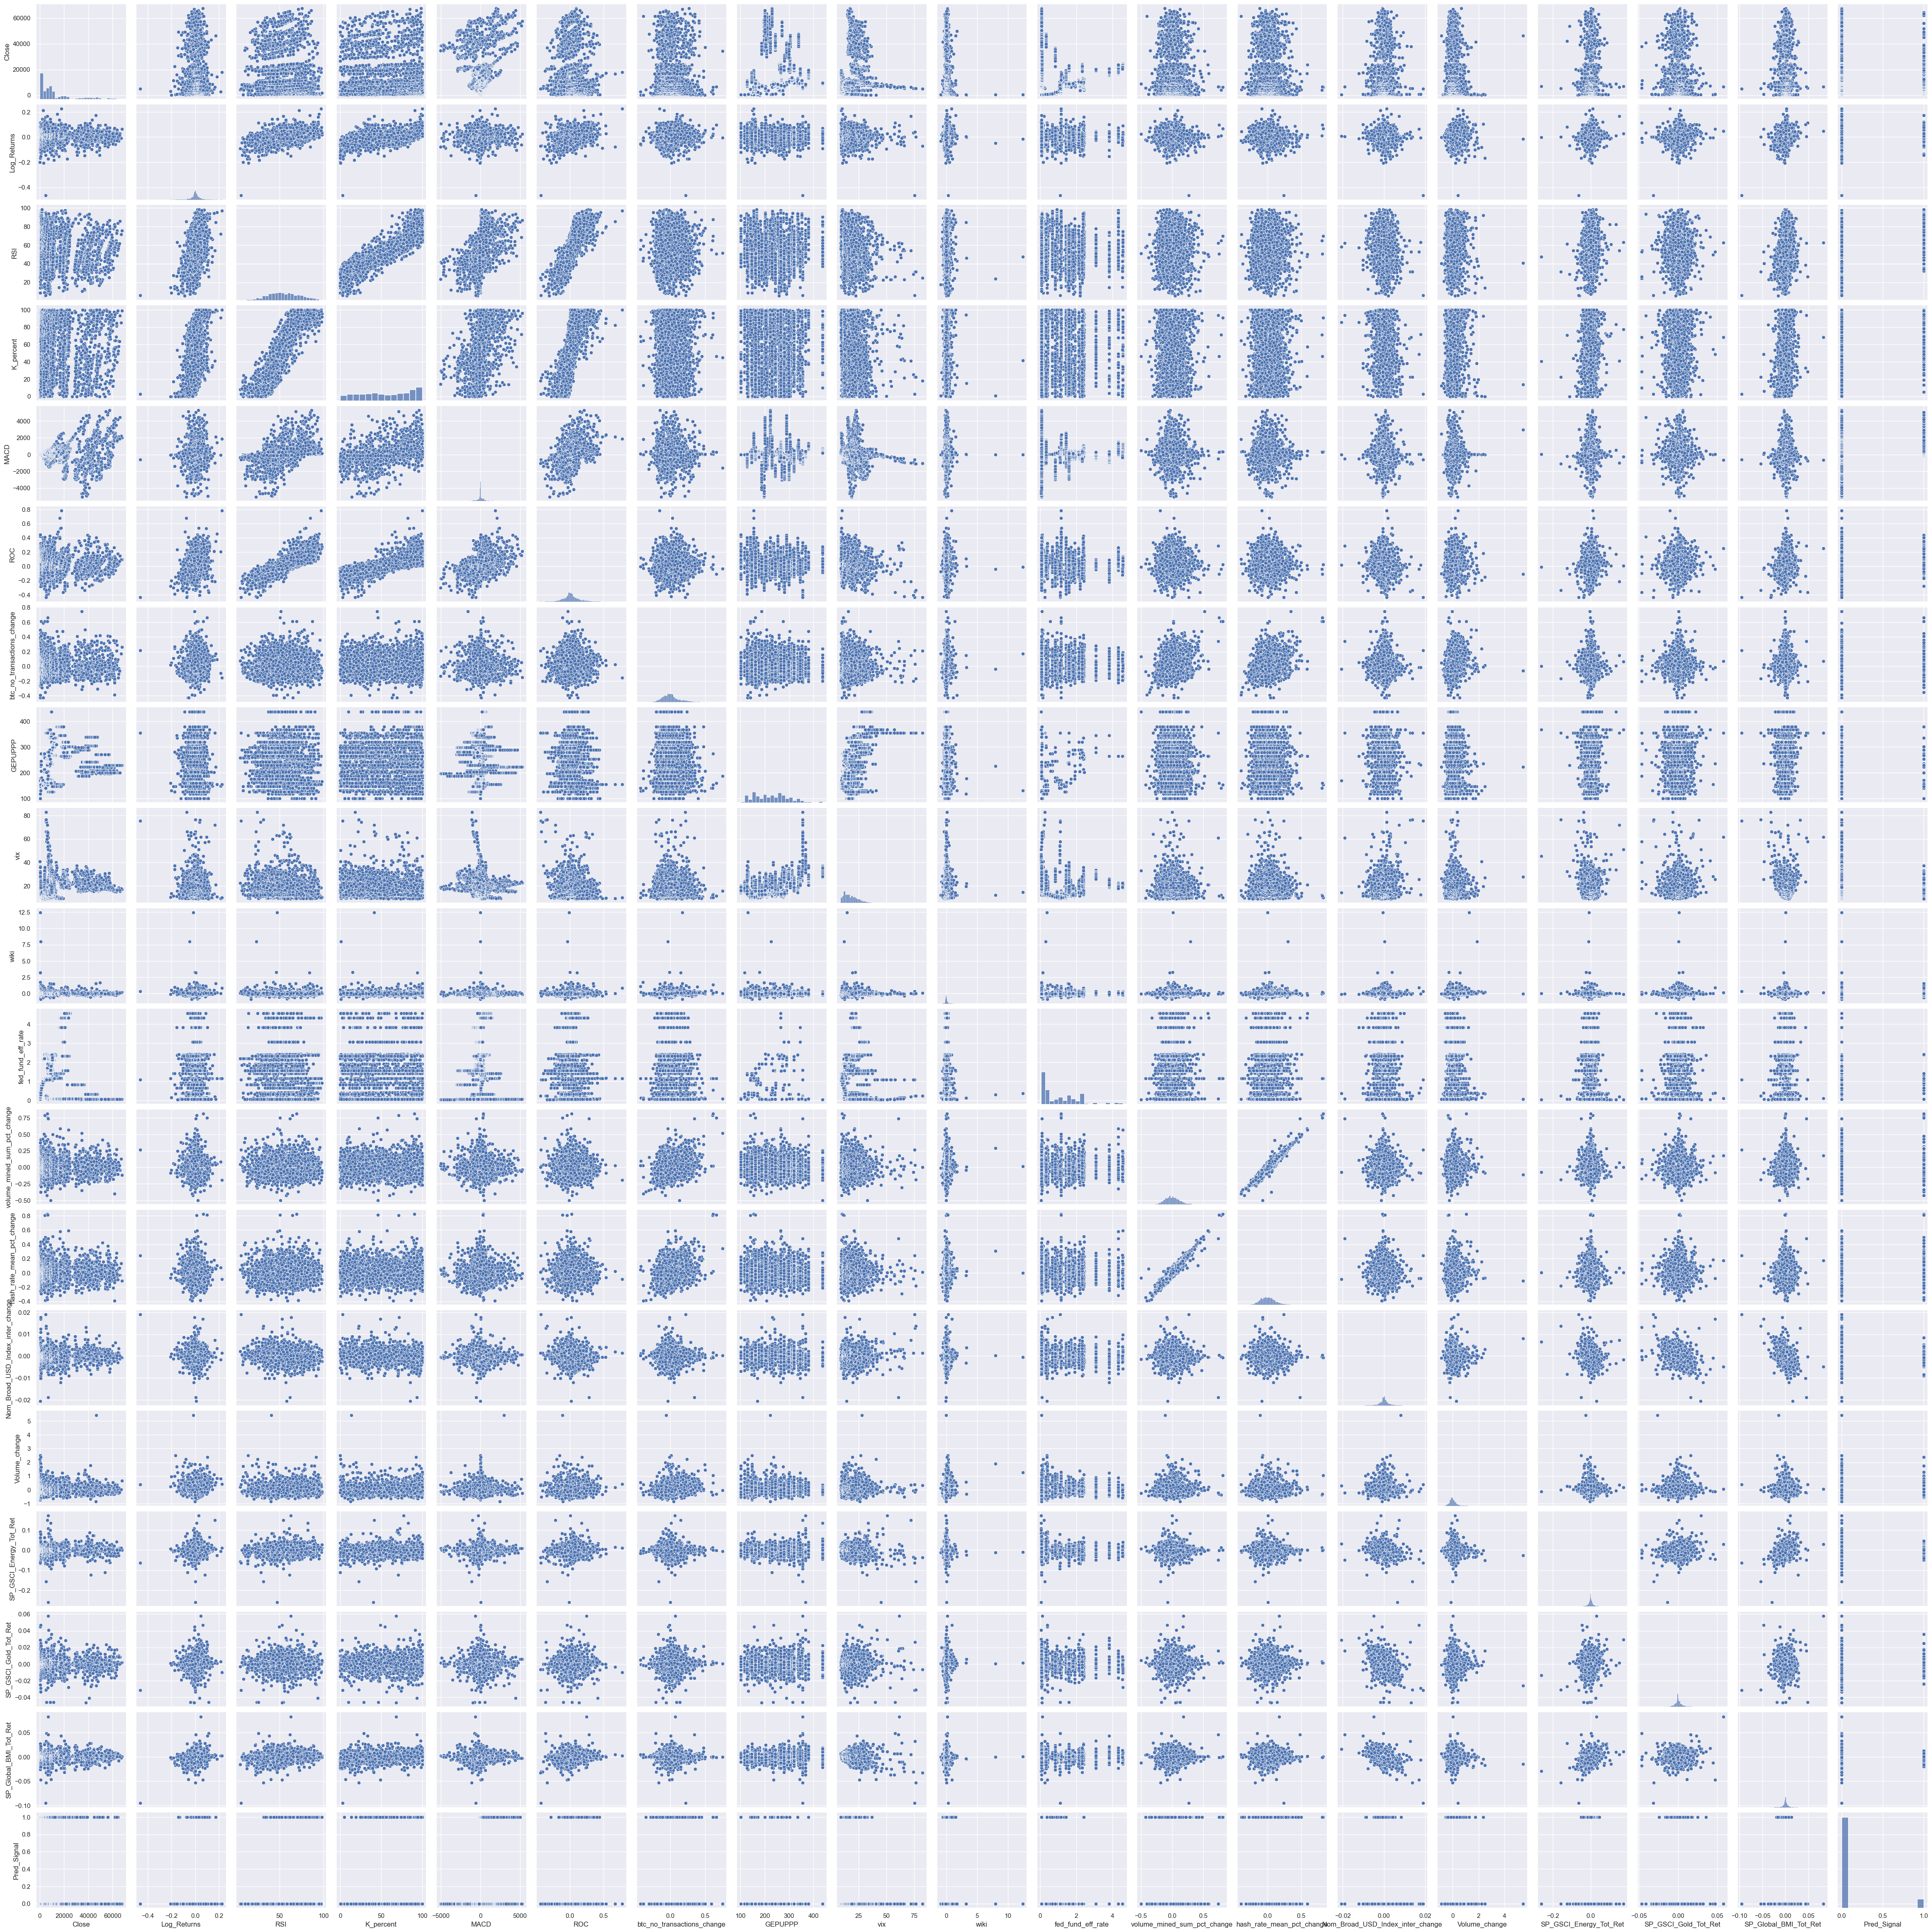

In [111]:
sns.pairplot(features)

# 3. Distribution of BTC Price

In [112]:
# Data import
data = pd.DataFrame(btc['Close'])
data

Close
Date                    
2015-07-01    258.621002
2015-07-02    255.412003
2015-07-03    256.335999
2015-07-04    260.885986
2015-07-05    271.912994
...                  ...
2023-03-06  22429.757812
2023-03-07  22219.769531
2023-03-08  21718.080078
2023-03-09  20363.021484
2023-03-10  20187.244141

[2810 rows x 1 columns]

Descriptive Statistics:
 count     2810.000000
mean     14364.929751
std      16308.444586
min        210.494995
25%       2291.052429
50%       8222.878906
75%      19793.788086
max      67566.828125
Name: Close, dtype: float64


Augmented Dickey-Fuller Test:
ADF Statistic: -1.7290
p-value: 0.4162
The time series is not stationary.

Breusch-Pagan Test:
LM Statistic: 2556.5439
LM-Test p-value: 0.0000
The time series is heteroscedastic.


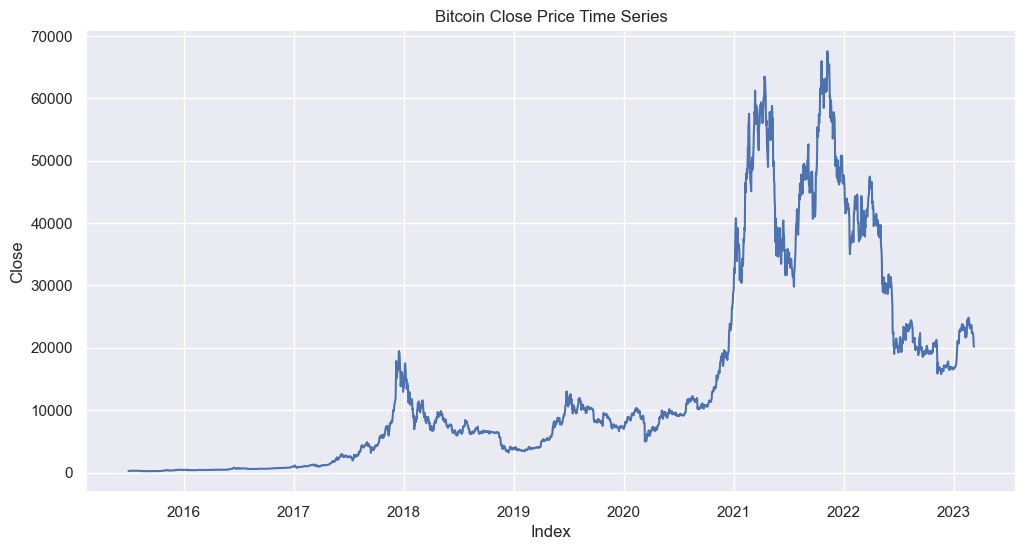

In [113]:
# Descriptive statistics
print("Descriptive Statistics:\n", data['Close'].describe())
print("\n")
# Test for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(data['Close'])
print("Augmented Dickey-Fuller Test:")
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))

# If the p-value is less than 0.05, the time series is stationary
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

# Test for homoscedasticity using the Breusch-Pagan test
data['Close_lagged'] = data['Close'].shift(1)
data.dropna(inplace=True)

y = data['Close']
X = sm.add_constant(data['Close_lagged'])

bp_result = het_breuschpagan(y, X)
print("\nBreusch-Pagan Test:")
print("LM Statistic: {:.4f}".format(bp_result[0]))
print("LM-Test p-value: {:.4f}".format(bp_result[1]))

# If the p-value is less than 0.05, the time series is heteroscedastic
if bp_result[1] < 0.05:
    print("The time series is heteroscedastic.")
else:
    print("The time series is homoscedastic.")

    
# Visualize the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y="Close")
plt.xlabel('Index')
plt.ylabel('Close')
plt.title('Bitcoin Close Price Time Series')
plt.show()

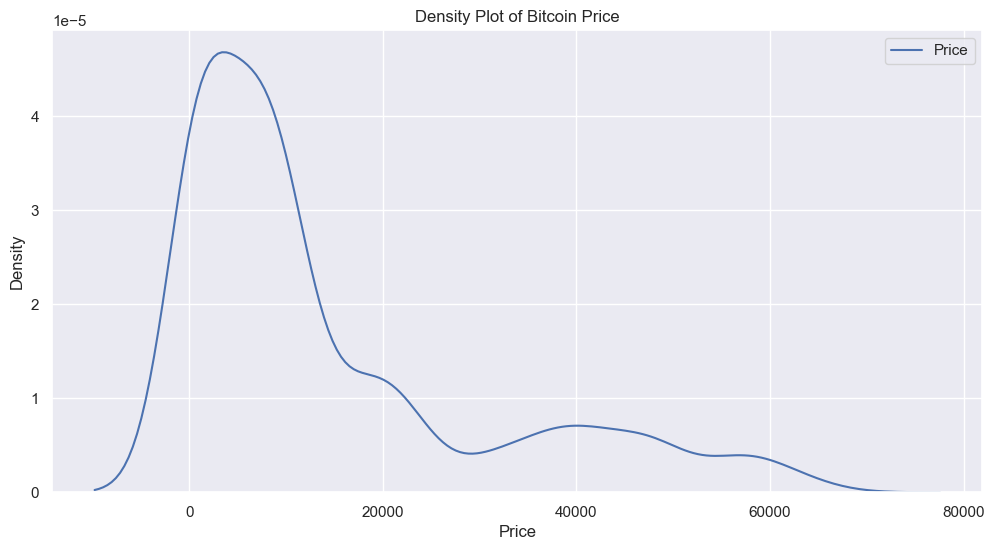

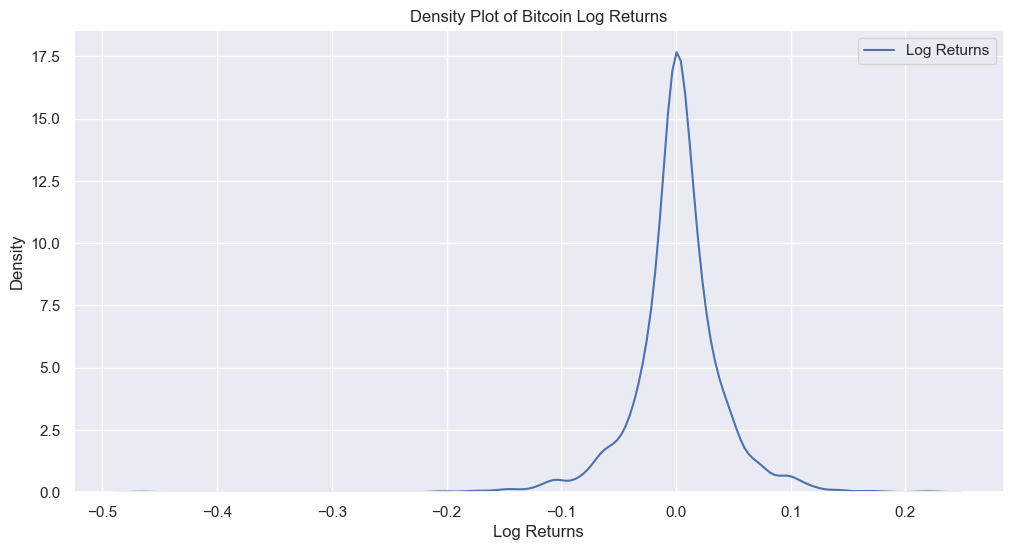

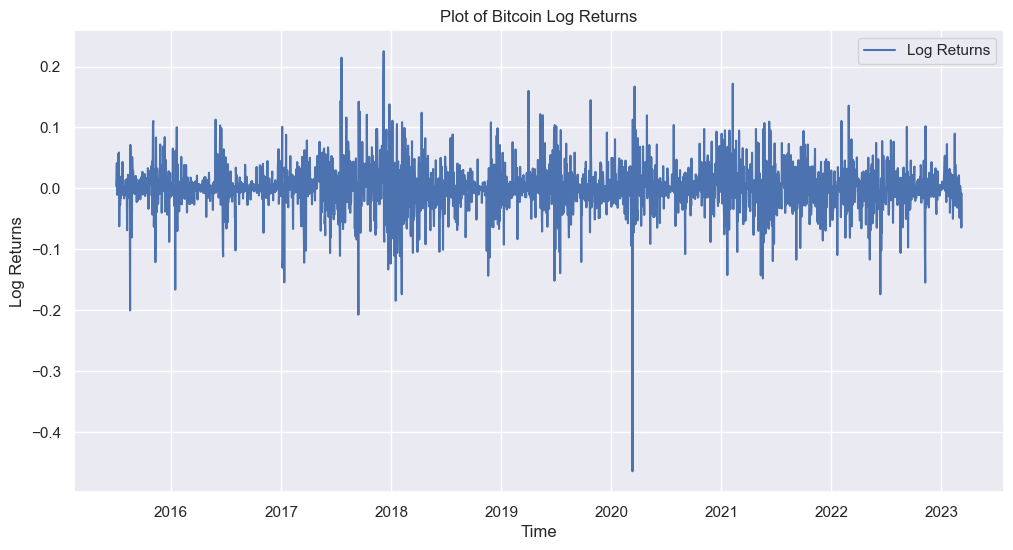

In [114]:
plt.figure(figsize=(12, 6))
# Calculate log returns
data['LogReturns'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

# Density plot of the price
sns.kdeplot(data=data, x='Close', label='Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Bitcoin Price')
plt.legend()
plt.show()

# Density plot of log returns
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='LogReturns', label='Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.title('Density Plot of Bitcoin Log Returns')
plt.legend()
plt.show()

# plot of log returns
plt.figure(figsize=(12, 6))
plt.plot(data['LogReturns'], label='Log Returns')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.title('Plot of Bitcoin Log Returns')
plt.legend()
plt.show()


In [115]:
# Perform the Shapiro-Wilk test on the log returns
shapiro_result = shapiro(data['LogReturns'])
print("Shapiro-Wilk Test:")
print("Test Statistic: {:.4f}".format(shapiro_result[0]))
print("p-value: {:.4f}".format(shapiro_result[1]))

# If the p-value is less than 0.05, the log returns are not normally distributed
if shapiro_result[1] < 0.05:
    print("The log returns do not follow a normal distribution.")
else:
    print("The log returns follow a normal distribution.")


Shapiro-Wilk Test:
Test Statistic: 0.9061
p-value: 0.0000
The log returns do not follow a normal distribution.


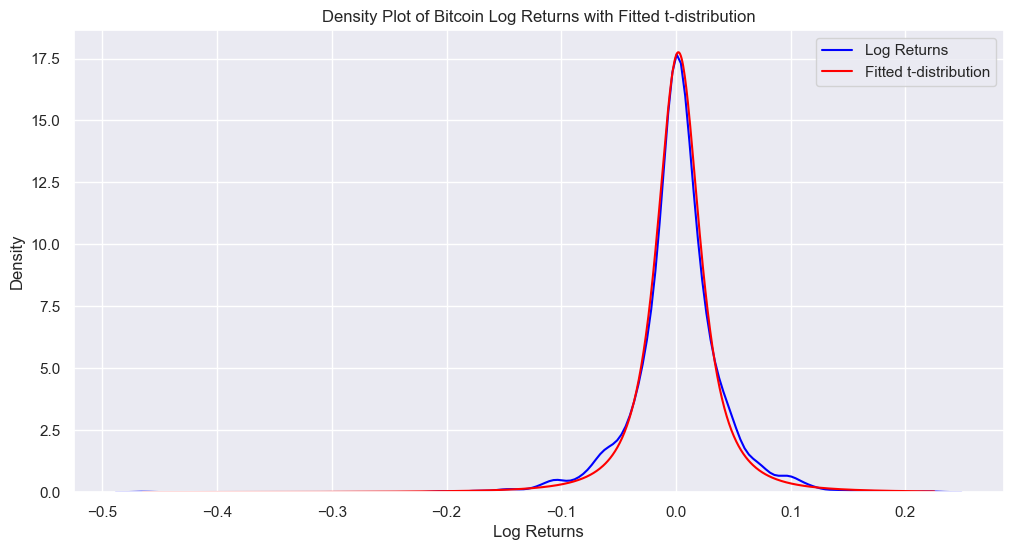

t-Distribution Parameters:
Test Statistic: 0.9061
p-value: 0.0000


Fitted t-distribution Parameters:
Degrees of Freedom (df): 2.1373
Location (loc): 0.0021
Scale (scale): 0.0201


In [116]:
# Fit a t-distribution to the log returns data
log_returns = data['LogReturns']
params = t.fit(log_returns)

# Generate an array of values for plotting the fitted t-distribution
x = np.linspace(min(log_returns), max(log_returns), num=1000)
fitted_t_dist = t.pdf(x, *params)

# Density plot of log returns with the fitted t-distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='LogReturns', label='Log Returns', color='blue')
plt.plot(x, fitted_t_dist, label='Fitted t-distribution', color='red')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.title('Density Plot of Bitcoin Log Returns with Fitted t-distribution')
plt.legend()
plt.show()

print("t-Distribution Parameters:")
print("Test Statistic: {:.4f}".format(shapiro_result[0]))
print("p-value: {:.4f}".format(shapiro_result[1]))
print("\n")
# Print the t-distribution parameters
print("Fitted t-distribution Parameters:")
print("Degrees of Freedom (df): {:.4f}".format(params[0]))
print("Location (loc): {:.4f}".format(params[1]))
print("Scale (scale): {:.4f}".format(params[2]))